# **Sentiment Analysis on [IMDB Dataset of 50K Movie Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data)**

## 🚀 **Let's Connect!**
<p align="left"> <a href="https://github.com/chiragpc2004" target="_blank"> <img src="https://img.shields.io/badge/GitHub-%23181717.svg?&style=for-the-badge&logo=github&logoColor=white" alt="GitHub"/> </a> <a href="https://www.linkedin.com/in/chiragpc2004/" target="_blank"> <img src="https://img.shields.io/badge/LinkedIn-%230077B5.svg?&style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn"/> </a> <a href="https://mail.google.com/mail/?view=cm&fs=1&to=chiragpc2004@gmail.com" target="_blank"> <img src="https://img.shields.io/badge/Gmail-%23D14836.svg?&style=for-the-badge&logo=gmail&logoColor=white" alt="Gmail"/> </a> </p>

## **Deep Learning Models**
With traditional machine learning models providing a solid baseline, we now advance to Deep Learning methods to capture more complex patterns in our text data. Leveraging neural networks, especially those tailored for sequential data, enables the model to understand the context and order of words — which is crucial in sentiment analysis.

We experiment with the following deep learning architecture:

1. **LSTM (Long Short-Term Memory)** – A type of recurrent neural network (RNN) designed to handle long-term dependencies in sequential data. LSTMs are particularly effective in natural language processing tasks as they can retain contextual information over longer sequences of text, making them ideal for understanding the sentiment expressed in reviews.

By incorporating LSTM, we aim to go beyond bag-of-words assumptions and explore how well the model can capture nuanced sentiment patterns using word embeddings and temporal dynamics

#### Import statements

In [13]:
# Core and Data Handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # type: ignore
# Encoding and Feature Extraction
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.metrics import confusion_matrix, accuracy_score # type: ignore
# Deep Learning
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Embedding, LSTM, Dense # type: ignore

In [8]:
# Read the dataset
df = pd.read_csv("D:/imdb-sentiment-classifier/data/processed/cleaned_data.csv")
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake think t...,0
4,petter matteis love time money visually stunni...,1


#### **Data Preparation**

#### Tokenization

In [9]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['review'])

#### Vectorization

In [10]:
# Vectorization for Deep Learning models
X_dl = tokenizer.texts_to_sequences(df['review'])

#### Padding

In [11]:
# Padding for equal length
X_dl = pad_sequences(X_dl, padding='post', maxlen=250)

In [12]:
X = X_dl
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [15]:
lstm = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=250),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = lstm.fit(X_train, y_train, epochs=8, validation_data=(X_test, y_test))

c:\Users\chira\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/8
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 110s 87ms/step - accuracy: 0.5066 - loss: 0.6919 - val_accuracy: 0.5175 - val_loss: 0.6842
Epoch 2/8
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 105s 84ms/step - accuracy: 0.5219 - loss: 0.6797 - val_accuracy: 0.5279 - val_loss: 0.6796
Epoch 3/8
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 123s 99ms/step - accuracy: 0.5869 - loss: 0.6234 - val_accuracy: 0.8456 - val_loss: 0.3694
Epoch 4/8
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 119s 96ms/step - accuracy: 0.8721 - loss: 0.3193 - val_accuracy: 0.8733 - val_loss: 0.3058
Epoch 5/8
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 108s 87ms/step - accuracy: 0.9061 - loss: 0.2448 - val_accuracy: 0.8713 - val_loss: 0.3079
Epoch 6/8
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 146s 118ms/step - accuracy: 0.9263 - loss: 0.2035 - val_accuracy: 0.8803 - val_loss: 0.3031
Epoch 7/8
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 107s 86ms/step - accuracy: 0.9427 - loss: 0.1656 - val_accuracy: 0.8774 - val_loss: 0.3108
Epoch 8/8
1240/1240 ━━━━━━━━━━━━━━━━━━━━ 107s 86ms/step - accuracy: 0.9571 

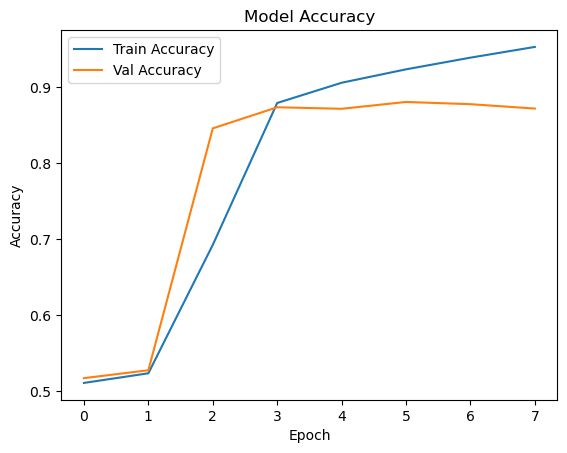

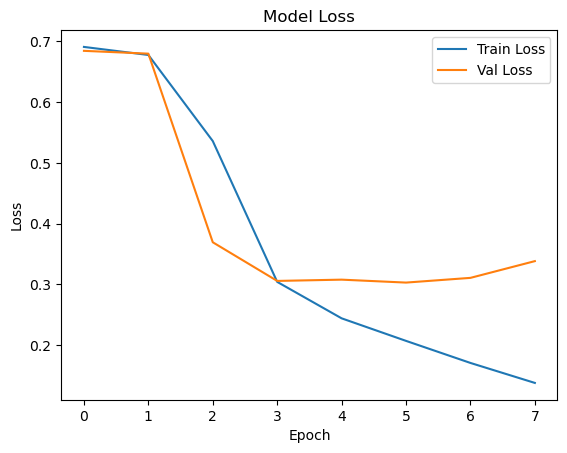

In [16]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Model visualization
lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,059,269 (4.04 MB)

 Trainable params: 353,089 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 706,180 (2.69 MB)

In [19]:
def classify_message(model,tokenizer, message):
    seq = tokenizer.texts_to_sequences([message])
    padded = pad_sequences(seq, maxlen=250)
    prediction = model.predict(padded)
    return "Positive" if prediction[0][0] > 0.5 else "Negative"

message = "The movie was really good! I enjoyed it a lot."

print(classify_message(lstm, tokenizer, message))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Positive
